train/Normal/0101.jpeg


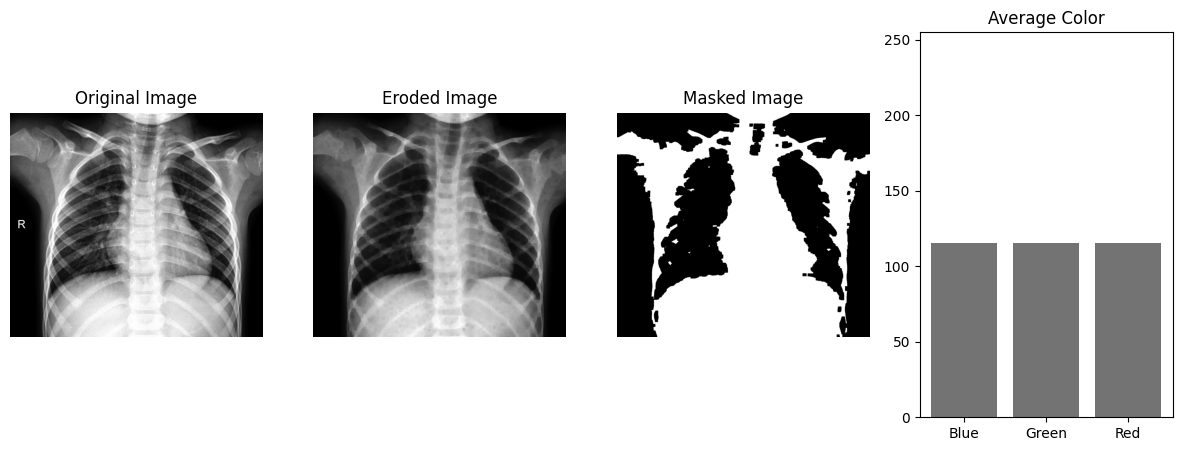

train/Bacterial Pneumonia/13.jpeg


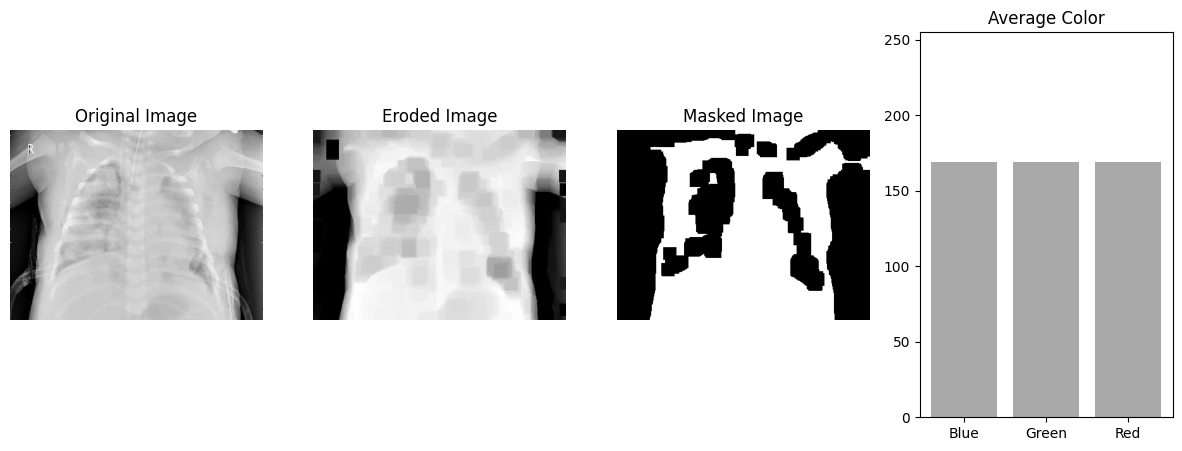

train/Viral Pneumonia/047.jpeg


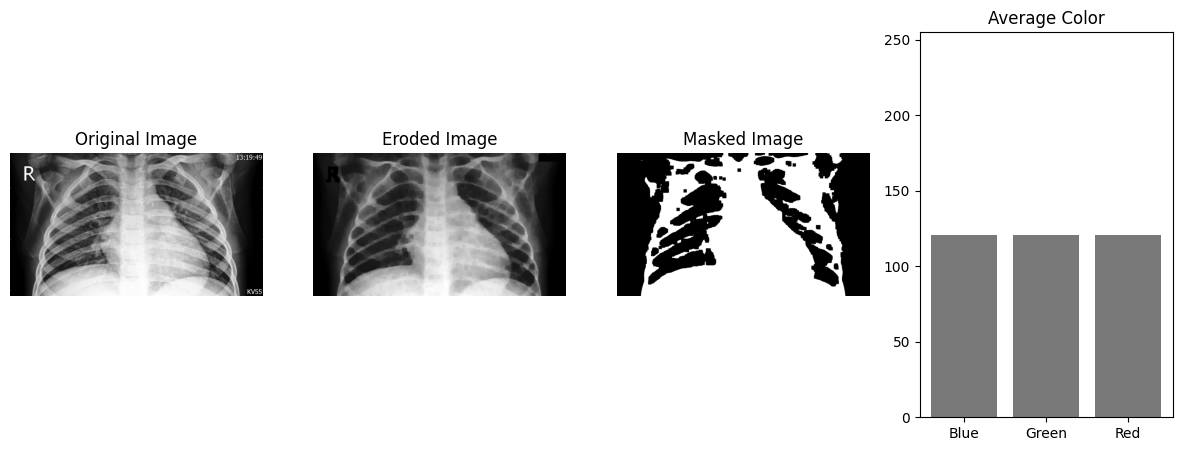

train/Normal/NORMAL2-IM-1376-0001.jpeg


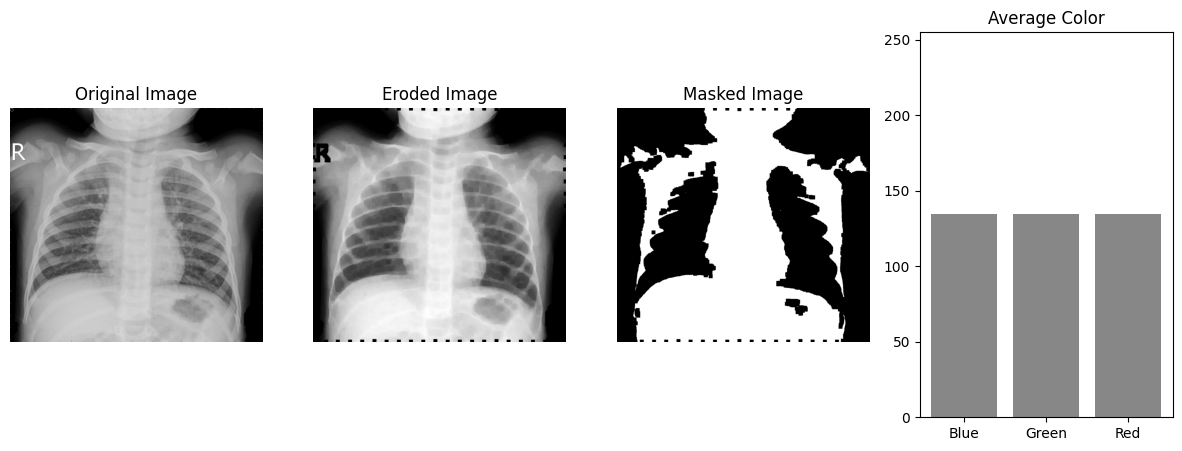

train/Bacterial Pneumonia/BACTERIA-8600331-0003.jpeg


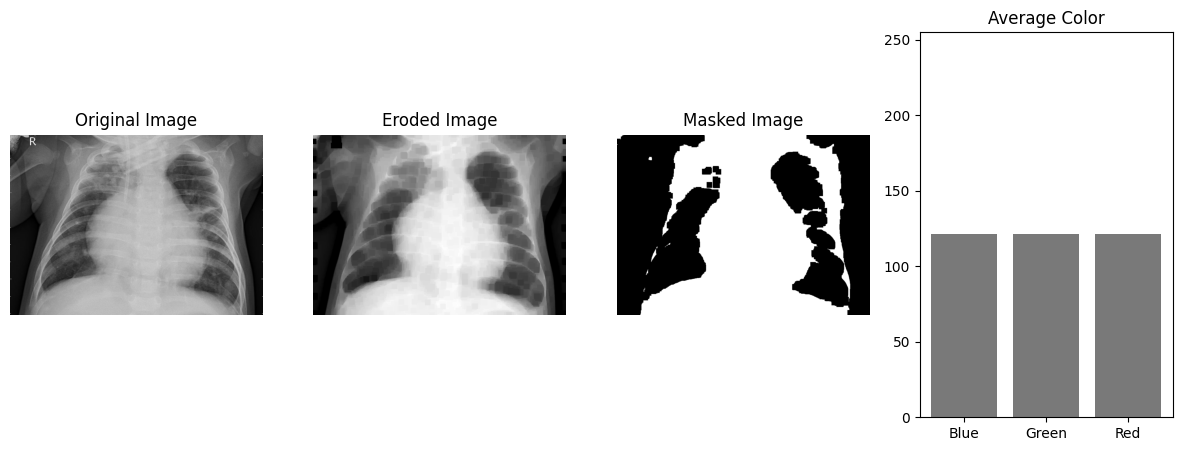

train/Viral Pneumonia/VIRUS-3590786-0010.jpeg


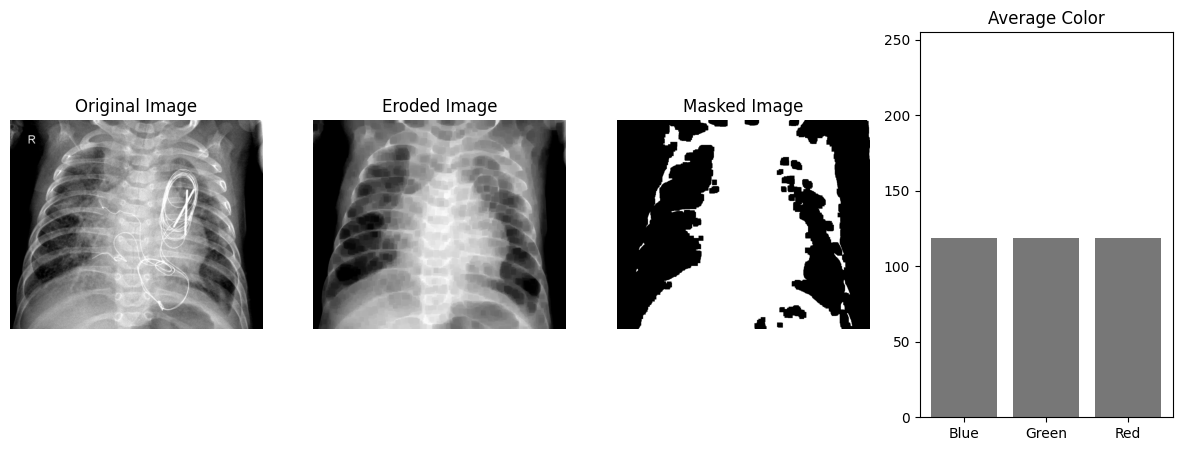

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_erosion(image_path, kernel_size=(5,5)):
    print(image_path)
    # Load the image
    original_image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    # Perform erosion
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    eroded_image = cv2.erode(grayscale_image, kernel, iterations=1)
    
    # Calculate the average color of the original image
    average_color = np.mean(original_image, axis=(0, 1))
    
    # Mask the eroded image
    masked_image = mask_image(eroded_image)
    
    # Display original, eroded, and masked images side by side
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(masked_image, cmap='gray')
    plt.title('Masked Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.bar(np.arange(len(average_color)), average_color, color=np.array(average_color)/255)
    plt.title('Average Color')
    plt.xticks(np.arange(len(average_color)), ['Blue', 'Green', 'Red'])
    plt.ylim(0, 255)
    
    plt.show()

def mask_image(eroded_image):
    # Calculate the 10th and 30th percentiles of the color range
    min_color = np.percentile(eroded_image, 50)
    max_color = np.percentile(eroded_image, 50)
    
    # Iterate through each pixel and mask based on percentile range
    masked_image = np.zeros_like(eroded_image)
    for i in range(eroded_image.shape[0]):
        for j in range(eroded_image.shape[1]):
            if eroded_image[i, j] <= min_color:
                masked_image[i, j] = 0  # Black
            elif eroded_image[i, j] >= max_color:
                masked_image[i, j] = 255  # White
            else:
                masked_image[i, j] = eroded_image[i, j]
    
    return masked_image

# Example usage:
image_path1 = "train/Normal/0101.jpeg"
image_path2 = "train/Bacterial Pneumonia/13.jpeg"
image_path3 = "train/Viral Pneumonia/047.jpeg"
image_path4 = "train/Normal/NORMAL2-IM-1376-0001.jpeg"
image_path5 = "train/Bacterial Pneumonia/BACTERIA-8600331-0003.jpeg"
image_path6 = "train/Viral Pneumonia/VIRUS-3590786-0010.jpeg"
kernel_size = (20, 20)
perform_erosion(image_path1, kernel_size)
perform_erosion(image_path2, kernel_size)
perform_erosion(image_path3, kernel_size)
perform_erosion(image_path4, kernel_size)
perform_erosion(image_path5, kernel_size)
perform_erosion(image_path6, kernel_size)
